<a href="https://colab.research.google.com/github/AnuragBhattacharjee17/Stock-Market-Value-Prediction-using-LSTM/blob/master/Smart_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import nltk
nltk.download("punkt")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    # for plotting graphs
from datetime import datetime       # to acess datetime
from pandas import Series
%matplotlib inline
import warnings  #To ignore the warnings warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
#Reading file into the notebook
df = pd.read_csv("/content/NSE-TATAGLOBAL11.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [64]:
df.shape

(1235, 8)

In [65]:
#Looking at the features of the dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [66]:
#Changing Datetime to datetime format from object format
df["Date"] = pd.to_datetime(df.Date,format="%Y-%m-%d")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


Text(0, 0.5, 'Closing Stock Value')

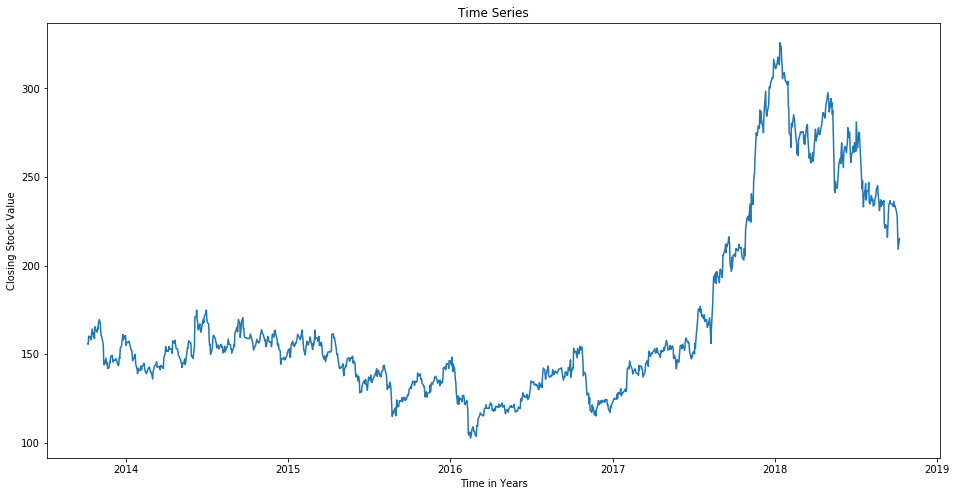

In [67]:
#Building plot for Date vs Close
df.index= df["Date"]
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.title("Time Series")
plt.xlabel("Time in Years")
plt.ylabel("Closing Stock Value")

In [68]:
#Here we set closing range as a target variable. And we create a new dataframe with Columns as Date and Close.
data = df.sort_index(ascending=True,axis=0)     # Sortring dataframe in ascending order
print(data.head())
print(data.shape)

                 Date    Open  ...  Total Trade Quantity  Turnover (Lacs)
Date                           ...                                       
2013-10-08 2013-10-08  157.00  ...             1720413.0          2688.94
2013-10-09 2013-10-09  155.70  ...             2049580.0          3204.49
2013-10-10 2013-10-10  156.00  ...             3124853.0          4978.80
2013-10-11 2013-10-11  161.15  ...             1880046.0          3030.76
2013-10-14 2013-10-14  160.85  ...             1281419.0          2039.09

[5 rows x 8 columns]
(1235, 8)


In [69]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=["Date","Close"])   # Creating skeleton of new data frame
print(new_data.shape)

(1235, 2)


In [70]:
for i in range(0,len(df)):
  new_data["Date"][i] = data["Date"][i]
  new_data["Close"][i] = data["Close"][i]
print(new_data.head())
print(new_data.shape)

                  Date   Close
0  2013-10-08 00:00:00   155.8
1  2013-10-09 00:00:00  155.55
2  2013-10-10 00:00:00  160.15
3  2013-10-11 00:00:00  160.05
4  2013-10-14 00:00:00  159.45
(1235, 2)


In [71]:
#Splitting data into training and validation 
train1 = new_data[:987]
valid1 = new_data[987:]
print(train.shape)
print(valid.shape)

(987, 1)
(248, 2)


In [0]:
''' LSTM for prediction'''

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [0]:
new_data.index = new_data.Date
new_data.drop("Date",axis=1,inplace=True)

In [0]:
dataset=new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]

In [0]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [0]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [89]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 62s - loss: 0.0012


In [0]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [0]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [93]:
#Finding Rms
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

24.230628122887364

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


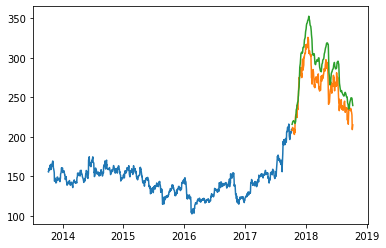

In [94]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'],label="Close")
plt.plot(valid[['Close','Predictions']])